### Dataset
- Nesse trabalho vou explorar uma conhecida base, boston dataset.
- Nela encontramos informações sobre algumas características de casas. Queremos estudar o comportamento dos preços desses imóveis para futuramente conseguirmos prever preços

### Objetivo Geral
- Gerar modelos de regressão capazes de prever preços de imóveis da base boston dataset

### Objetivos Específicos
- Trabalhar de maneira mais direcionada com modelos de regressão:
    1. Regressão Linear Bidimensional
    2. Regressão Linear Multidimensional
    3. Regressão Ridge
    4. Regressão Lasso
    5. Regressão por Rede Elástica
- Etapa de 'Reshape' no treinamento de modelos com apenas 1 feature
- Estudar o conceito Cross-validation de maneira mais aprofundada
- Primeiro contato com o tema 'Tuning Hyperparameters'


### Fonte
- Projeto pessoal com os assuntos abordados no módulo: <br>
    'Supervised Learning with scikit-learn - Regression', da plataforma DataCamp, trilha 'Machine Learning Scientist with Python'
- O conteúdo teórico e as imagens foram retiradas dos slides da aula

# Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Train Test Split 
from sklearn.model_selection import train_test_split, GridSearchCV

# Métrica
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Compreensão Base
### Visualização Inicial

In [3]:
# Importando a Base
boston_df = pd.read_csv('datacamp_workspace_export_2022-03-25 13_38_06.csv')
display(boston_df)

,index,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


- Existe uma quantidade razoável de colunas
- Aparentemente só existem dados numéricos

In [4]:
# Verificação Colunas
print('\n'.join(list(boston_df.columns)))

index
CRIM
ZN
INDUS
CHAS
NX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV


### Descrição Colunas

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000's

### Análise Inicial

In [5]:
boston_df.isnull().sum().sort_values(ascending = False)

MEDV       0
LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NX         0
CHAS       0
INDUS      0
ZN         0
CRIM       0
index      0
dtype: int64

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    506 non-null    int64  
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NX       506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
 14  MEDV     506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
boston_df.describe()

,index,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston_df.skew().sort_values(ascending = False)

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NX         0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
index      0.000000
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

- Não existem valores vazios
- Os dados estão sendo interpretados corretamente (int ou float)
- As escalas das colunas são relativamente distintas
- A maior parte das colunas possuem assimetria positiva, sendo com maior valor a coluna 'CRIM'
- Nesse trabalhos não vou me preocupar muito com a etapa de pre-processamento, mas seria aconselhável trabalhar a questão da assimetria e as escalas das colunas visando melhores resultados no treinamento dos modelos. Nesse caso só me interessa avaliar os tipos de regressões lineares e métodos de regularização de coeficientes, por isso não vou dar muita atenção a essa etapa 

# Exploratory Data Analysis (EDA)
### Análise Geral

<AxesSubplot:>

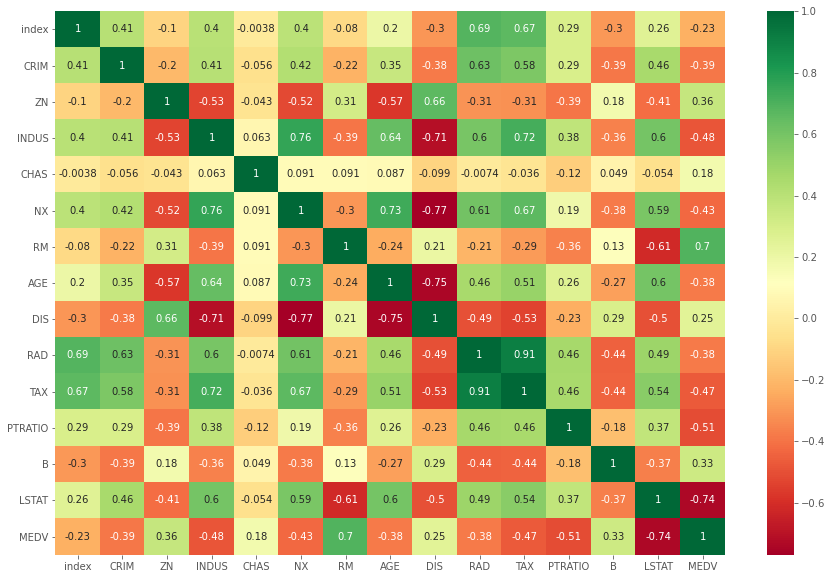

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(boston_df.corr(), annot=True, cmap='RdYlGn')

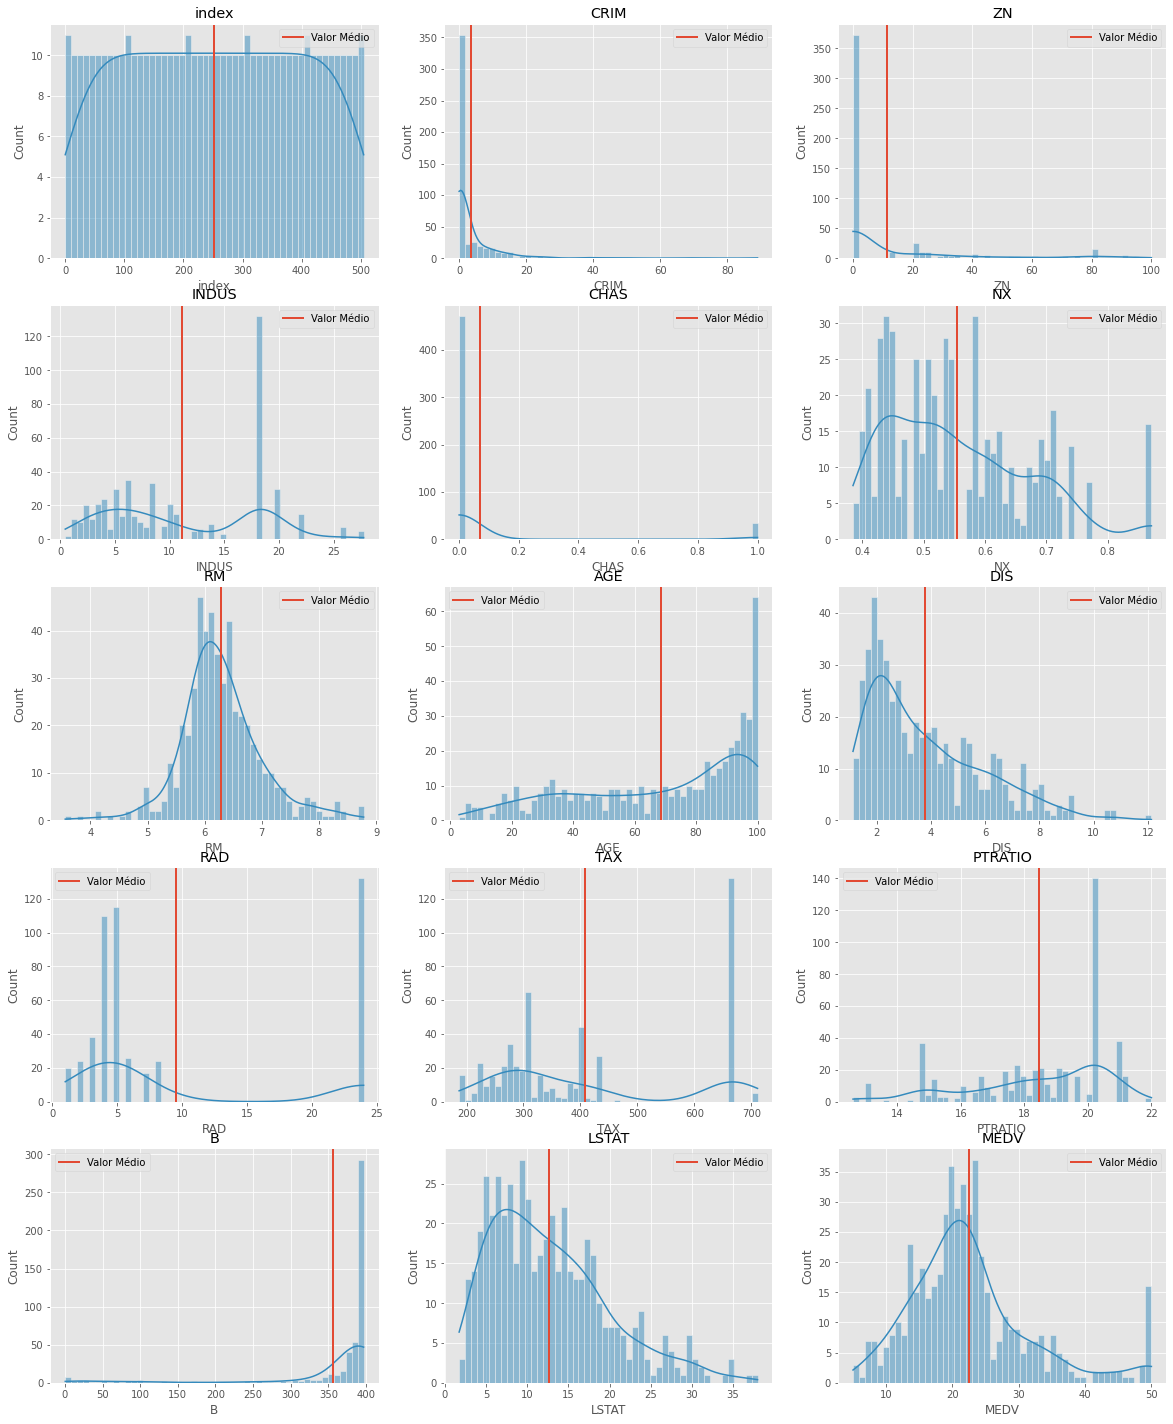

In [10]:
# Histogramas
plt.figure(figsize = (20,25))

for i, coluna in enumerate(boston_df.columns):
    plt.subplot(5,3,i+1)
    g = sns.histplot(boston_df[coluna],bins = 50,kde = True)
    mean = boston_df[coluna].mean()
    plt.axvline(mean,linewidth = 2, label = 'Valor Médio')
    g.set_title(coluna)
    plt.legend()
plt.show()

- Através dos histogramas é possível ver claramente a distribuição assimétrica de algumas colunas, como por exemplo a coluna 'CRIM' e a coluna 'B'

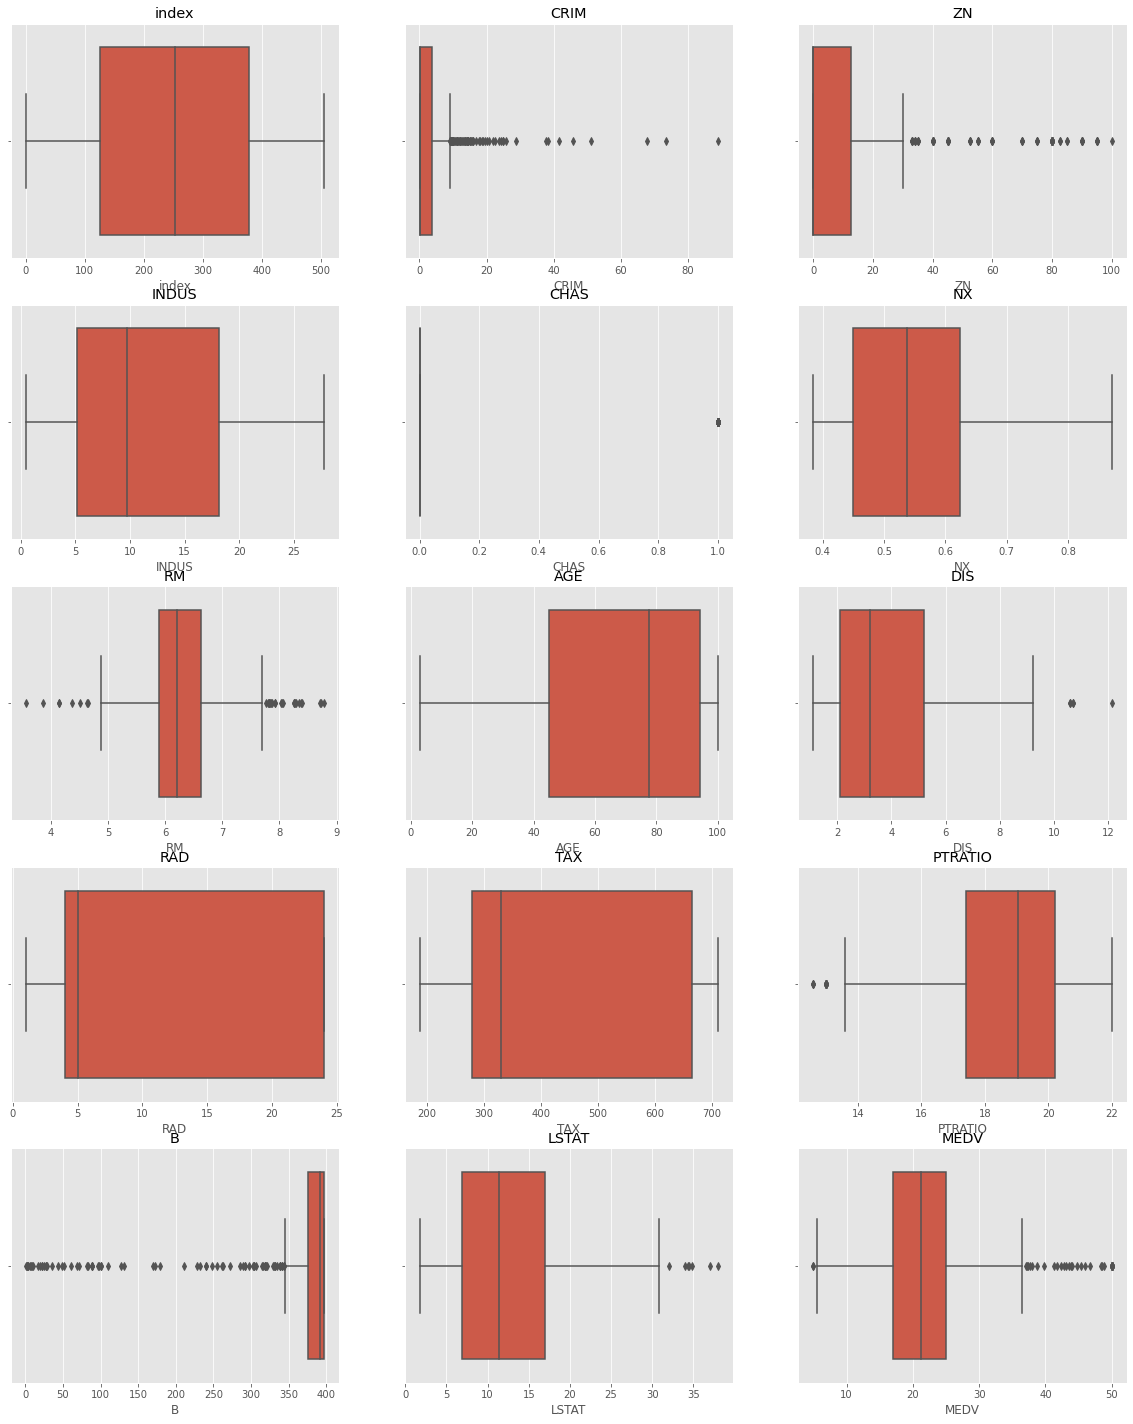

In [11]:
# Boxplot
plt.figure(figsize = (20,25))

for i, coluna in enumerate(boston_df.columns):
    plt.subplot(5,3,i+1)
    g = sns.boxplot(x = boston_df[coluna])
    g.set_title(coluna)
plt.show()

- Existem muitos outliers em várias das colunas, especialmente nas colunas 'CRIM' e 'B'

<Figure size 3600x3600 with 0 Axes>

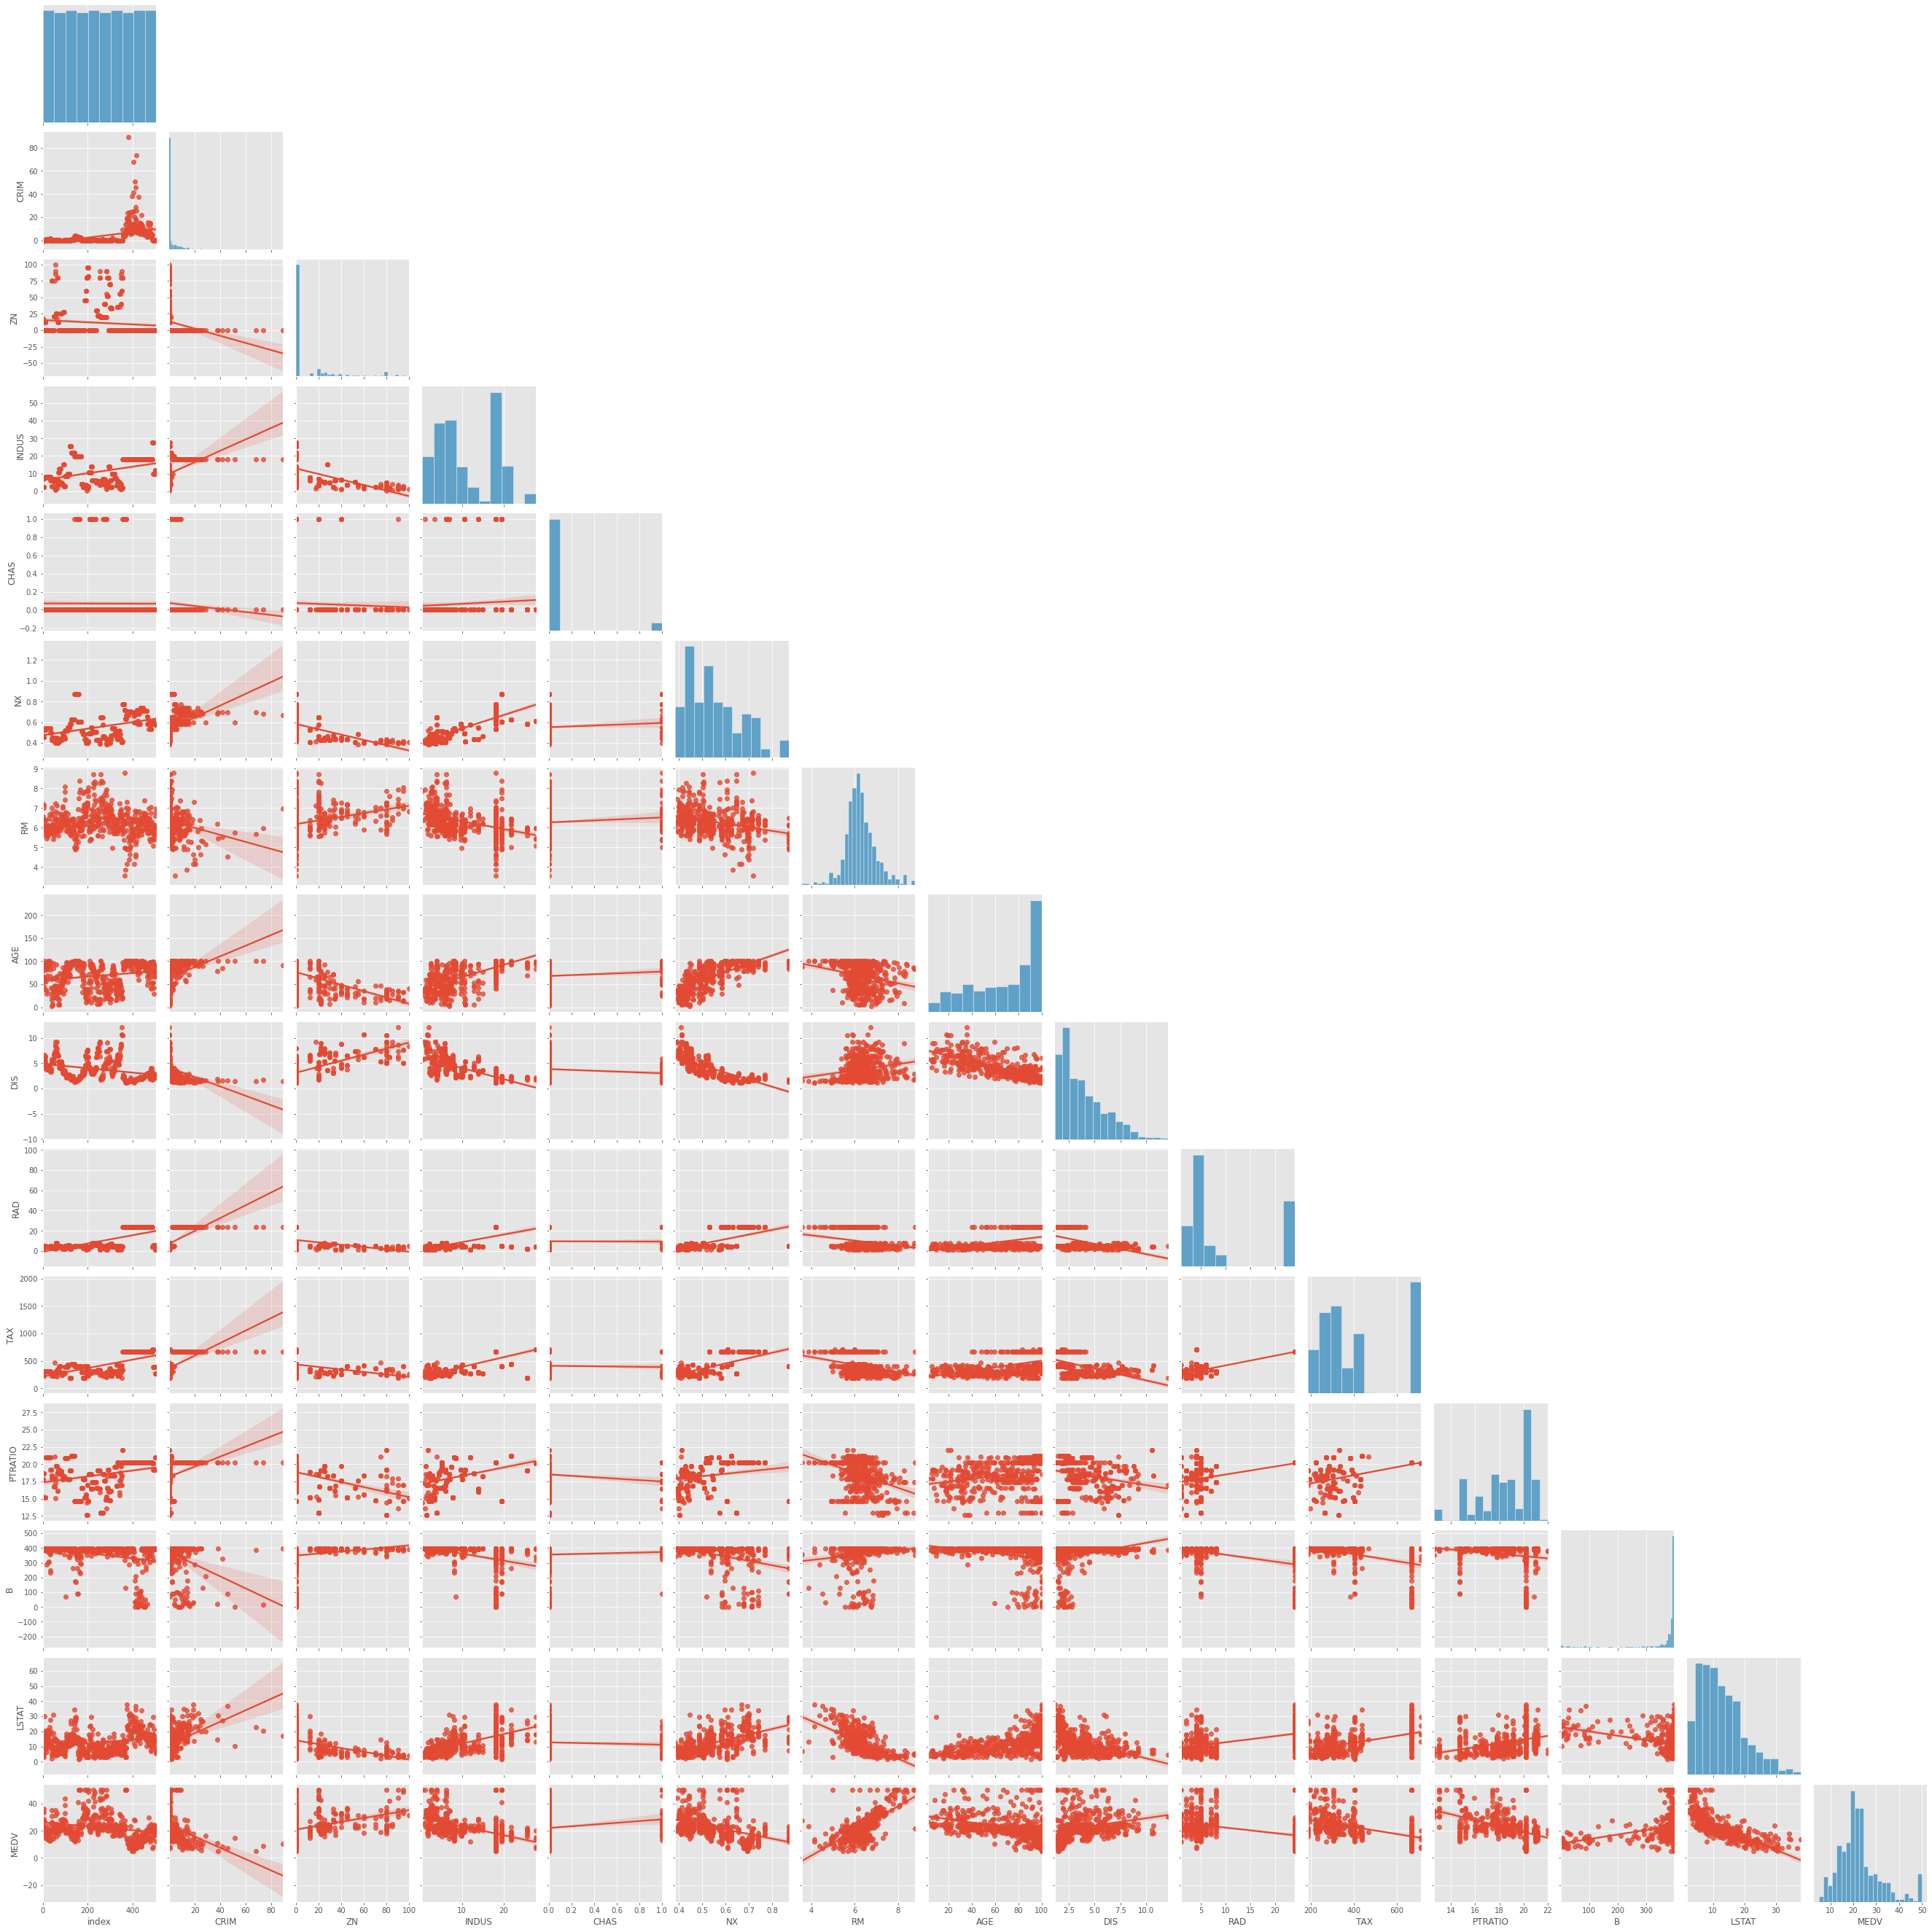

In [12]:
# Pairplot
plt.figure(figsize = (50,50))
sns.pairplot(boston_df, kind = 'reg', corner = 'True')

- Algumas relações entre as colunas chamaram a atenção, vamos analisar mais a fundo

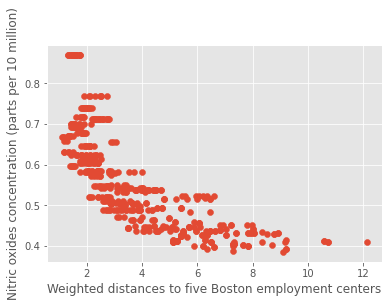

In [13]:
plt.scatter(boston_df.DIS, boston_df.NX)
plt.ylabel('Nitric oxides concentration (parts per 10 million)')
plt.xlabel('Weighted distances to five Boston employment centers')
plt.show()

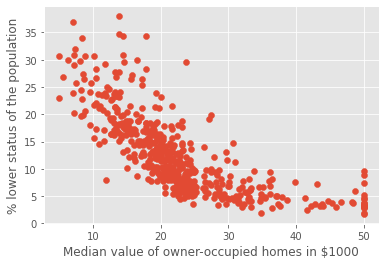

In [14]:
plt.scatter(boston_df.MEDV, boston_df.LSTAT)
plt.ylabel('% lower status of the population')
plt.xlabel('Median value of owner-occupied homes in $1000')
plt.show()

# Treinamento Modelos

In [15]:
# Separando em variável dependente (target) e variáveis independentes
X = boston_df.drop('MEDV', axis = 1).values
y = boston_df['MEDV'].values

- Obs: Quando colocamos o '.values' deixamos os valores de X e y na forma de np.array

In [16]:
X_rooms = X[:, 6]
display(X_rooms)

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

### Reshape
- Esse processo pode parecer um pouco confuso (pelo menos para mim foi nas primeiras vezes que tive contato com ele), então vou tentar mostrar de uma forma bem clara o que está acontecendo

In [17]:
# Vamos criar 2 arrays
m = np.array([1,2,3])
o = np.array([[1],[2],[3]])
# Agora vamos avaliar duas dimensões
print(m.shape, o.shape)

(3,) (3, 1)


- A diferença é que no segundo caso os valores estão em listas independentes
- Quando usamos 1 feature para treinar nosso modelo esse é um processo necessário
- Quando pegamos apenas 1 feature os dados ficam no formato errado e precisamos transformá-los
- Mas agora como transformá-los?

In [18]:
# Reshape
n = m.reshape(-1,1)
n.shape

(3, 1)

- Observe que conseguimos corrigir para a dimensão correta com o comando reshape!

In [19]:
# Dimensões de X e y antes do redimensionamento
print("Dimensão de y antes o reshape: ", y.shape)
print("Dimensão de y antes o reshape: ", X_rooms.shape)

Dimensão de y antes o reshape:  (506,)
Dimensão de y antes o reshape:  (506,)


In [20]:
# Redefinindo array shape
y = y.reshape(-1, 1)
X_rooms =  X_rooms.reshape(-1, 1)

In [21]:
# Dimensões de X e y após do redimensionamento
print("Dimensão de y após o reshape: ", y.shape)
print("Dimensão de y após o reshape: ", X_rooms.shape)

Dimensão de y após o reshape:  (506, 1)
Dimensão de y após o reshape:  (506, 1)


- Observe que a transformações ocorreu sem problemas, agora podemos trabalhar com nossos dados sem problemas

- Observe a diferença entre o 'tamanho' dos arrays antes e depois do reshape

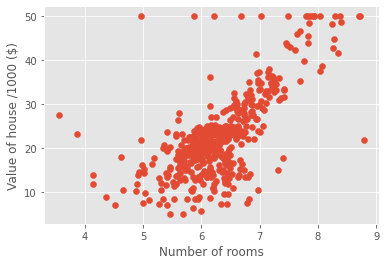

In [22]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# Modelo - Regressão Linear Bidimensional
- O modelo de regressão linear bidimensional talvez seja o modelo mais simples de regressão, vamos estudá-lo um pouco mais detalhadamente
- Quando se trata de um análise bidimensional temos a seguinte equação para o modelo: <br>
    y = a*x + b
- 'a' e 'b' são constantes a serem descobertas
- Mas qual o critério usamos para traçar a reta de ajusto do modelo? 

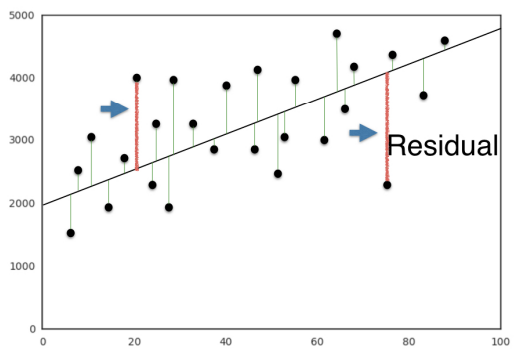

- Observe que a reta não passa diretamente sobre todos os pontos
- Melhor será nossa reta de ajuste quanto menor for o 'resíduo' entre os pontos e a reta
- Ou seja, quanto mais perto esses pontos estiverem da nossa reta melhor o modelo!
- Vale ressaltar que como existem pontos acima e abaixo, devido aos sinais contrários das distâncias, os valores poderiam se cancelar e chegaríamos a um resultado incorreto. Por isso, calculamos não a soma de cada resíduo, mas sim a soma dos quadrados dos resíduos
- A função que minimiza a soma dos quadrados dos resíduos se chama: Ordinary Least Squares (OLS)

In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

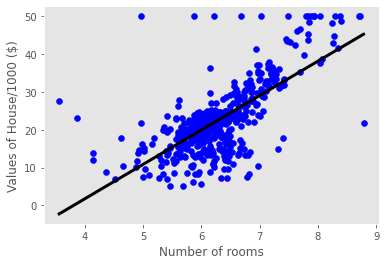

In [24]:
# Plot dos pontos X_rooms e y (target)
plt.scatter(X_rooms, y, color='blue')

# Definindo intervalo
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)

# Prevendo valores
y_pred = reg.predict(prediction_space)

# Reta da Regressão Linear
plt.plot(prediction_space,
         y_pred,
         color='black',
         linewidth=3)

plt.ylabel('Values of House/1000 ($)')
plt.xlabel('Number of rooms')
plt.grid()

plt.show()

In [25]:
# Métrica Modelo R²
print(reg.score(X_rooms, y))

0.48352545599133423


- O resultado foi bem ruim, o número de quartos , avaliado isoladamente, não é uma boa opção para prever o valor do imóvel

# Modelo - Regressão Linear Multidimensional
- E quando não temos apenas 2 varáveis?
- Nesse caso também podemos usar uma regressão linear, mas NÃO será a comum! O nome desse tipo de regressão é 'Linear Regression in Higher Dimensions'
- Digamos que queremos avaliar 3 ao invés de 2 variáveis, como ficaria a equação do modelo? <br>
    y = a1*x1 + a2*x2 + b
- Quando se trata de um análise multidimensional acredito que fica intuitivo ver que chegaremos na seguinte equação: <br>
    y = a1*x1 + a2*x2 + a3*x3 + ... + an*xn + b
- Sendo a1, a2, a3, ..., an constantes a serem descobertas
- O critério usamos para traçar a reta de ajuste é exatamente o mesmo

In [26]:
from sklearn.model_selection import train_test_split

# Separando em dados de treino e teste
# Lembrando, anteriomente separamos X e y em variáveis independentes (X) e variável dependente (y)
# Vamos considerar nossa base completa, ao invés de tentar prever o valor de y apenas com o número de quartos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)


# Criando/Treionando o modelo
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7051609808903437

- Atenção! Enquanto nos modelos de classificação usamos a acurácia como métrica de avaliação aqui nos modelos de regressão estaremos usando o R²
- Ainda existem vários outros tipos de métricas além do R²!
- Uma outra opção de métrica muito utilizada é o erro quadrado médio - Root Mean Squared Error (RMSE)

In [27]:
from sklearn.metrics import mean_squared_error

# R² 
print("R^2: {}".format(reg_all.score(X_test, y_test)))
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7051609808903437
Root Mean Squared Error: 4.68714924106903


# Cross-validation

- Cross validation foi um tema abordado em projetos passasdos
- ja sabemos que a performance do modelo é dependende da forma como dividimos nossa base
- Uma alternativa para termos um valor mais confiável é aplicar o processo de 'Validação cruzada' ou 'Cross validation'

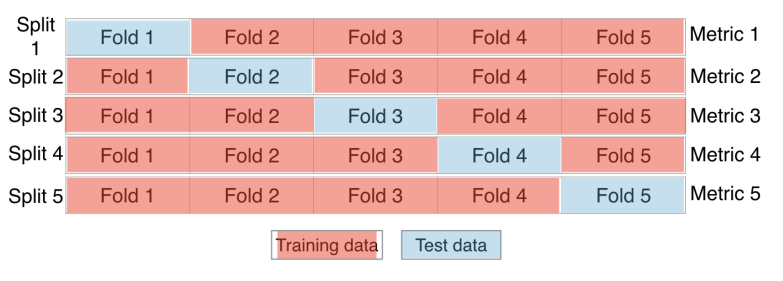

- A imagem acima mostra uma base de dados sendo dividida 5 vezes em dados de treino e dados de teste
- A diferença entre elas é a porçao separada para teste e porção separada para treino
- Em cada uma delas podemos verificar o R² e depois aplicar a média e assim obter um valor de R² mais confiável do modelo
- Vale ressaltar, quanto mais vezes fizermos essa seperação da base em novas porções mais confiável é o resultado, porém mais caro do ponto de vista de processamento dos dados

In [28]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

# Atenção! Precisamos passar a informação de quantas vezes queremos repetir do processo de cross-validation
# Devemos passar isso no parâmetro 'cv'
# Para um cv = 5, o processo será repetido 5 vezes
# Em outras palavras, vamos obter 5 valores de R² e poderemos computar o valor médio
cv_results = cross_val_score(reg, X, y, cv = 5)

print(cv_results)
print(f'O valor médio obtido foi de: {cv_results.mean()}')

[ 0.57280576  0.72459569  0.59122862  0.08126754 -0.20963498]
O valor médio obtido foi de: 0.3520525256628649


- Obtivemos um resultado muito interessante
- Para o mesmo modelo e para os mesmos dados poderíamos ter obtido um valor de R² muito bom de 0,72 e também, caso não déssemos muita sorte, um valor bem ruim 0.08
- Por isso precisamos avaliar o valor médio!
- Outro ponto para se destacar, por default o processo de cross-validation usa como métrica o R². Caso queira avaliar outra métrica terá que utilizar o parâmetro 'scoring'

### Tempo de processamento
- Vamos avaliar o tempo de treino de um processo de cross-validation com 3 e 10 iterações

In [29]:
# 3 iterações
%timeit cross_val_score(reg, X, y, cv = 3)

4.04 ms ± 446 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
# 10 iterações
%timeit cross_val_score(reg, X, y, cv = 10)

14.7 ms ± 544 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- O tempo de processamento com 10 iterações foi aproximadamente 3x mais demorado
- Por isso é necessário avaliar bem quantas iterações realmente são necessárias
- Tempos maiores na etapa de cross validation se traduzem em processos computacionais mais custosos

# Regularized Regression
- Utilizar o modelo de regressão linear pode ser um problema quando se tem uma quantidade muito grande de features
- Na regressão linear cada feature fica associada a um coeficiente
- Dependendo do valor dos coeficientes (caso eles sejam muito grandes para algumas features e muito pequenos para outras), isso pode nos levar ao overfitting
- Resolvemos isso com métodos de regularizar esses coeficientes!
- A ação de penalizar esses coeficientes que são maiores se chama 'Regularização'
- Vamos abordar agora outros 2 tipos de regressão que atuam justamente nesse problema:
    1. Ridge Regression
    2. Lasso Regression

### Ridge Regression

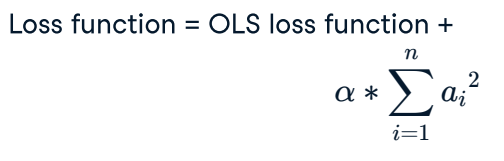

- Lembra do parâmetro OLS? Ele era a  função que minimiza a soma dos quadrados dos resíduos
- Agora além dele teremos mais um fator
- O parametro 'alfa' é escolhido por nós mesmo
- Ele é semelhante a escolher o número de vizinhos no modelo k-NN
- Valores de alfa muito baixos fazem o modelo ficar com uma cara de regressão linear comum (pode levar ao Overfitting). 
- Valores muito altos de alfa podem levar a underfitting (perde muito a especificidade do modelo, fica muito genérico)

In [31]:
from sklearn.linear_model import Ridge

# Separando a base em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
# Treinando o modelo
# Escolhendo um baixo valor de alfa
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6977072273529517

In [32]:
cv_results = cross_val_score(ridge, X, y, cv = 5)

print(cv_results)
print(f'O valor médio obtido foi de: {cv_results.mean()}')

[0.62210077 0.74734591 0.58404731 0.15827615 0.05780286]
O valor médio obtido foi de: 0.4339146009912779


In [33]:
# Treinando o modelo
# Escolhendo um alto valor de alfa
ridge = Ridge(alpha=0.9, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.631440879667233

In [34]:
cv_results = cross_val_score(reg, X, y, cv = 5)

print(cv_results)
print(f'O valor médio obtido foi de: {cv_results.mean()}')

[ 0.57280576  0.72459569  0.59122862  0.08126754 -0.20963498]
O valor médio obtido foi de: 0.3520525256628649


- Veja que a escolha do alfa impactou bastante no valor de R²
- Vamos avaliar de maneira mais aprofundade o alfa

In [35]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)
    
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    print(f'O valor de cross-validation máximo foi de: {np.max(cv_scores)}')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

O valor de cross-validation máximo foi de: 0.35079374162815685


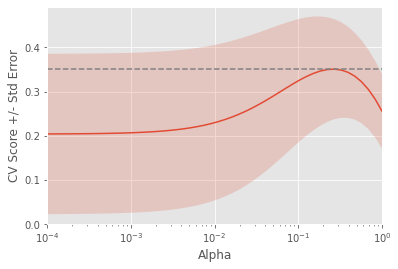

In [36]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std (Standard Deviation) of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

- Esse gráfico deixa bem evidente o comportamento do valor obtido pelo cross-validation para vários valores de alfa

### Lasso Regression

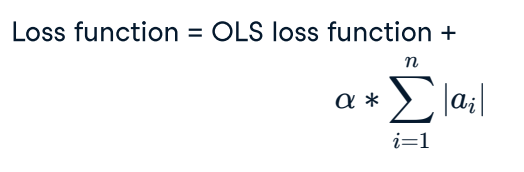

- Lasso regression é bem semelhante a Ridge Regression
- Ao invés do valor 'ai²', temos o valor ai em módulo

- Esse tipo de regressão também pode ser usada para selecionar features mais importantes da base
- Atribui valor 0 para features de baixa importância dando maior valor as features mais necessárias

In [37]:
from sklearn.linear_model import Lasso
# Separando a base
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
# Criand modelo
# Atribuindo alfa = 0.1
lasso = Lasso(alpha = 0.1, normalize = True)
# Treinando 
lasso.fit(X_train, y_train)
# Previsão
lasso_pred = lasso.predict(X_test)
# Avaliando R²
lasso.score(X_test, y_test)

0.5950229653464187

In [38]:
# treinando o modelo
features = boston_df.drop('MEDV', axis = 1).columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X, y)

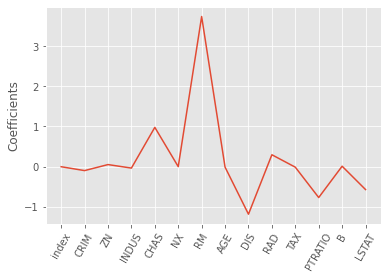

In [39]:
# Avaliando os coeficientes
lasso_coef = lasso.fit(X, y).coef_
g = plt.plot(range(len(features)), lasso_coef)
g = plt.xticks(range(len(features)), features, rotation=60)
g = plt.ylabel('Coefficients')
plt.show()

- Observe a diferença de valor dos coefientes
- Isso impacta diretamente na atuação da feature no modelo!
- Pelo gráfico vemos claramente que a feature 'RM' tem uma enorme participação no nosso modelo

O valor de cross-validation máximo foi de: 0.39634539168120486


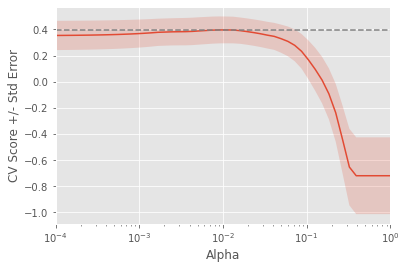

In [40]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
lasso_scores = []
lasso_scores_std = []

# Create a ridge regressor: ridge
lasso = Lasso(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    lasso.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    lasso_cv_scores = cross_val_score(lasso, X, y, cv = 5)
    
    # Append the mean of lasso_cv_scores to ridge_scores
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    # Append the std (Standard Deviation) of lasso_cv_scores to lasso_scores_std
    lasso_scores_std.append(np.std(lasso_cv_scores))

# Display the plot
display_plot(lasso_scores, lasso_scores_std)

# Hyperparameter tuning
- Outro tópico que quero discutir nesse Projeto é sobre avaliar os melhores parâmetros para os modelos que treinamos
- Nos trabalhos anteriores vimos modelos em que devíamos escolher determinados parãmetros:
    1. Regressão Linear
    2. Ridge/Lasso: Escolher alfa
    3. k-Nearest Neighbors: Escolher n_neighbors
- Parâmetros que precisam ser especificados antes de treinar o modelo são chamados 'Hyperparameters'
- Para avaliarmos o melhor alfa ou o melhor k precisamos testar vários valores e ver qual deles nos gera um melhor modelo
- Para isso usamos o método 'GridSearchCV', ele nos auxilia a achar os melhores valores para nossos Hyperparâmetros
- Aplicar o método de cross validation é essencial! Precisamos de valores de métricas confiáveis para estipular a melhor combinação de hiperparâmetros

# Elastic Net
- Por fim vamos avaliar agora um modelo que combina alguns conceitos das regressões Ridge e Lasso
- Lasso: Usa regularização do tipo L1
- Ridge: Usa regularização do tipo L2
- Elastic Net: Usa tanto um perâmetro de regularização que é combinação linear de L1 e L2, observe:

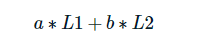

- O termo representado pela figura é chamado 'l1_ratio'
- Quando 'l1_ratio' vale 1, temos então a regularização tipo L1 (Lasso) e qualquer valor menos que 1 temos uma combinação linear dos parâmetros L1 e L2
- Vamos usar o comando 'GridSearchCV' para buscar os melhores valores de Hiperpartâmetros para os nossos modelos

In [41]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv = 5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.6587475972650002
Tuned ElasticNet MSE: 25.915930404190338


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3542.226925294216, tolerance: 2.138958896694215
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3669.840629361711, tolerance: 2.106010169421488
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3427.4688608920997, tolerance: 1.9782090743801652
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

# Conclusão
- A regressão linear multidimensional foi a que teve o melhor resultado
- Tanto a regressão Ridge como a Lasso tiveram resultados muito ruins, ficando abaixo dos 40% no valor de R² após a etapa de cross validation
- A regressão por rede elástica teve um resultado melhor que a lasso e ridge, porém ainda ficou abaixo da regressão linear multidimensional
- O projeto ajudou a entender como funcionam vários tipos de modelos de regressão, abordando 2 modelos de regressão com regularização muito importantes, Ridge e Lasso e também o modelo de regressão por rede elástica que se basia nos conceitos de regularização L1 e L2
- No último caso, para a regressão por rede elástica também foi feita uma tentativa de selecionar os melhores hiperparâmetros através do comando 'GridSearchCV'. Nos próximos projetos vou abordar o tema de melhora de hiperparâmetros de maneira mais aprofundada
- Talvez uma etapa de pré-processamento mais rigorosa tivésse ajudado a atingir melhores resultados, focando especificamente em corrigir assimetria dos dados e as escalas das colunas que eram discrepantes